# Assignment 7
## Cole Dixon



### problem 1
#### part a
The brute force solution would be to check every possible contiguous subsequence, add up the numbers, and keep track of what the highest sum is throughout. There are $\frac{n(n-1)}{2}$ subsequences in a list of size n. This means that the solutions would be $O(n^2)$ time just to check each substring. It also takes linear time to traverse each contiguous subsequence and add up the numbers meaning the solution is not $O(n^3)$.

In [8]:
import math
import numpy as np
from matplotlib import pyplot as plt
import time

#### part b
The top down approach would involve starting with the whole array A. If we assume that the array ends at index $i$ then we can say that $largest_sum(A[:i]) = max(A[i],largest_sum[A[:i-1]+A[i]]). This means we must simply iterate through all values of i and keep track of this largest sum as we go. This is where memoization comes in to store these values and not recompute the sums every time. We  The runtime is $O(n)$ because we only need to perform this procedure for every end index i, and the procedure only involves constant time operations such as comparisons and addition. 

In [72]:
# part a

def brute_force_1(A):
    largest = 0
    for i in range (len(A)):
        for j in range(len(A)-i):
            sum = np.sum(A[i:-j])
            if sum > largest: largest = sum
    return largest

# part b
#top down
def dynamic_1(A):
    def aux(A, sums):
        if len(A) == 1:
            sums.append(A[0])
            return sums
        else:
            sums = aux(A[:-1],sums)
            if sums[-1] + A[-1] > A[-1]:
                sums.append(sums[-1] + A[-1])
            else:
                sums.append(A[-1])
            return sums
    sums = []
    aux(A, sums)
    return np.max(sums)


# bottom up start at the first index
def bottom_up_1(A):
    sums = [A[0]]
    largest = A[0]
    for i in range(1,len(A)):
        #print("iteration:",i,"\nsums:",sums,"largest:",largest)
        if sums[i-1]+A[i] > A[i]:
            sums.append(sums[i-1]+A[i])
        else:
            sums.append(A[i])
        largest = np.max([largest,sums[i]])
    return largest

#part d return continuous subsequence
def dynamic_1(A):
    def aux(A, sums):
        if len(A) == 1:
            sums.append(A[0])
            return sums
        else:
            sums = aux(A[:-1],sums)
            if sums[-1] + A[-1] > A[-1]:
                sums.append(sums[-1] + A[-1])
            else:
                sums.append(A[-1])
            return sums
    sums = []
    aux(A, sums)
    return np.max(sums)


        
    

6
6
6


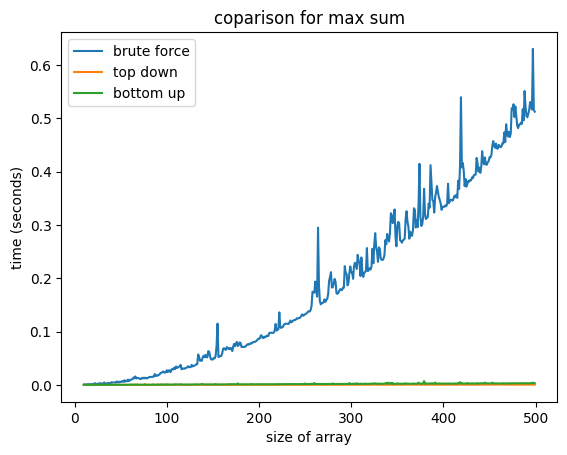

In [73]:
test = [-2, 1, -3, 4, -1, 2, 1, -5, 4]
print(brute_force_1(test))
print(dynamic_1(test))
print(bottom_up_1(test))

bf = []
td = []
bu = []
for n in range(10,500):
    A = np.random.randint(-50,50,size=n)
    start = time.perf_counter()
    brute_force_1(A)
    end = time.perf_counter()
    bf.append(end-start)

    start = time.perf_counter()
    dynamic_1(A)
    end = time.perf_counter()
    td.append(end-start)

    start = time.perf_counter()
    bottom_up_1(A)
    end = time.perf_counter()
    bu.append(end-start)

fig, ax = plt.subplots()
x_axis = range(10,500)
ax.plot(x_axis,bf,label = "brute force")
ax.plot(x_axis,td,label = "top down")
ax.plot(x_axis,bu,label = "bottom up")
ax.set_xlabel("size of array")
ax.set_ylabel("time (seconds)")
ax.set_title("coparison for max sum")
ax.legend()
plt.show()

## Problem 2


part a] We are essentially just calculating the shortest path of a weighted graph in which the nodes are all of the hotels, the edges go from hotel a to hotel b if hotel b is along the way to the destination from hotel a. The weights of the graph are given by the penalty function. This means that our function F which returns the minimal penalty to get to hotel $H_n$ from $H_0$ is $F(H_n) = min(F(H_0) + pen(H_0,H_n), ... , F(H_{n-1}) + pen(H_{n-1},H_n))$. The graph here is already topologically sorted and it is clearly a DAG because you will never drive backwards. So, we know the runtime is $O(|v|+|e|)$ where $|v| = n$ the number of hotels, and $|e| = \frac{n*(n-1)}{2}$. The large number of edges makes this $O(n^2)$

part b] 


## Problem 3

part a] 

In [75]:
import nltk
nltk.download('words')
from nltk.corpus import words
english_words = set(words.words())
def d(word):
    if len(word) == 1:
        if word.lower() != 'a' and word.lower() != 'i': return False
    return word.lower() in english_words

[nltk_data] Error loading words: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1129)>


LookupError: 
**********************************************************************
  Resource [93mwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('words')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/words[0m

  Searched in:
    - '/Users/coledixon/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.9/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.9/share/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.9/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


## Problem 4